# Assignment 2 Relativistic Dynamics
based on https://www.compadre.org/PICUP/exercises/Exercise.cfm?A=RelativisticDynamics-1D-ConstantForce&S=3 by Larry Engelhardt

This Assignment should take you approximately 120 minutes to complete.

After completing this assignment, you will be able to...
* Execute a working simulation, and explain non-relativistic, constant force motion (Step 1)
* Manipulate and explain the units that appear in the context of relativistic motion (Step 2)
* Interpret plots of energy vs. time for non-relativistic motion (Step 2)
* Observe and explain when the non-relativistic form of Newton’s 2nd Law breaks down (Step 3)
* Derive the relativistic form of Newton’s 2nd Law (Step 4)
* Modify a non-relativistic simulation to incorporate relativity (Step 5)
* Produce and interpret plots for relativistic motion (Steps 6, 7, 8)
* Validate numerical results by comparing with an analytical solution (Step 7)
* Apply simulated results to a particle accelerator (Steps 9 and 10)
Optionally, you will be able to...
* Rewrite code to store data in arrays using array indices rather than by appending data to arrays (Step 11)

Dr. Lane welcomes your questions about this assignment. Please send or bring a copy of your work-in-progress with your questions.

## Theory
Read or skim this section before proceeding to the Steps below. You'll want to refer back to this section as you complete this Assignment.

### Derivation of acceleration (NON-relativistic)

The force on a charged particle in an electric field, $\epsilon$ is
$$F = q\epsilon$$
where $q=+e$ for a proton. (Note that we're using $\epsilon$ since we'll need $E$ for energy later.) If we let $\epsilon$ have a very simple fixed value, $\epsilon = 1$ Volt/meter, then
$$F = 1\textrm{ eV/meter.}$$
The *NON*-relativistic version of Newton's 2nd Law is
$$a = \frac{F_{Net}}{m},$$
so a proton in an electric field $\epsilon = 1$ Volt/meter will experience a (non-relativistic) acceleration given by
$$a = \frac{1\textrm{ eV/meter}}{0.938\times 10^9\textrm{ eV/}c^2}.$$
(The mass of a proton is $m = 0.938\times 10^9\textrm{ eV/}c^2$.) We can cancel the eV that appear in both the numerator and denominator, reducing the acceleration to
$$a = \frac{c^2}{0.938\times 10^9\textrm{ meter}},$$
which does indeed have units of acceleration ($c^2$/meter).

**Euler-Cromer algorithm**

A very important task in computational physics is to numerically integrate the equations of motion,
$$\begin{eqnarray}
\frac{dx}{dt} &=& v, \text{ and}  \\\
\frac{dv}{dt} &=& a,
\end{eqnarray}
$$
to calculate the position, $x(t)$, and velocity, $v(t)$, of one or more objects as a function of time. Recall from calculus that the definition of a derivative is
$$ \begin{eqnarray}
\frac{dx}{dt} &=& \lim_{\Delta t \rightarrow 0} \left[ \frac{x(t+\Delta t) - x(t)}{\Delta t} \right], \text{ or} \\\
\frac{dx}{dt} &=& \lim_{\Delta t \rightarrow 0}  \frac{\Delta x}{\Delta t},
\end{eqnarray} $$
where $\Delta t$ represents a small change in time, and $\Delta x$ represents the change in position that occurs during the time interval, $\Delta t$. For sufficiently simple situations, these equations can be integrated analytically (with a paper and pencil) to calculate $x(t)$ and $v(t)$. For many situations, including relativistic motion, these equations are too complex to be solved analytically; the math doesn't exist to solve them. The alternative is to numerically integrate the equations using the computer to repeatedly take small steps forward in time. Taking "small steps forward in time" means that initially $t=0$; after one step, $t=\Delta t$; after two steps, $t=2 \Delta t$; after three steps, $t=3 \Delta t$; etc.

There are many methods (or "algorithms") for numerically integrating these equations of motion, but the simplest method is the "Euler method". The Euler-Cromer method consists of the following argument:

1. Starting with equations above, assume that we will use a finite time step, $\Delta t$,  sufficiently small that $dx/dt \approx \Delta x/\Delta t$. Note that this introduces an *approximation*, so the results will generally not be exact.
2. If $dx/dt \approx \Delta x/ \Delta t$, then in the equations above we can treat $dx$ and $dt$ as ***finite*** rather than infinitesimal quantities. 
3. Since $dx$ and $dt$ can be treated as finite quantities, we are free to multiply both sides of the equations by $dt$, thus obtaining $dx = v \times dt$. 
4. The same analysis applies to the relationship between acceleration and velocity: $dv = a \times dt$.

**Summary of the Euler-Cromer algorithm**

Based on the argument above, the amount that a quantity will change during a finite time step, $dt$, can be approximated by:
$$ \text{(change in a quantity)} = \text{(derivative of that quantity)} \times \text{(size of the time step)} $$
For the specific example described here, the derivative of position is velocity, so for one dimensional motion, $dx = v \times dt$.
The same argument can also be applied to calculate the change in velocity, $dv = a \times dt$.

**Newton's 2nd Law (relativistic form):**

Newton's $2^{\textrm{nd}}$ law can *always* be written
$$ \vec{F} = \frac{d\vec{p}}{dt}, $$
where $\vec{F}$, $\vec{p}$, and $t$ represent force, momentum, and time, respectively. For objects moving at speeds much slower than the speed of light,
$$ \vec{p} = m\vec{v}, $$
and substituting the equation for $\vec{p}$ into the equation for $\vec{F}$ provides the familiar result,
$$ \vec{F} = m\vec{a}. $$

For objects that are moving at speeds that are a significant fraction of the speed of light, $\vec{p} = m\vec{v}$ must be replaced with
$$ \vec{p} = \gamma m \vec{v}, $$
where the Lorentz factor $\gamma$ is defined as
$$ \gamma = \frac{1}{\sqrt{1-\left(\frac{v}{c}\right)^2}}. $$
Note, that for $v \ll c$ the Lorentz factor reduces to $\gamma \approx 1$, so we recover the non-relativistic form of momentum, $\vec{p} \approx m\vec{v}$. However, when $v$ is *not* much smaller than $c$, the familiar version of Newton's 2nd Law is not valid: $\vec{F} \neq m\vec{a}$. Instead, substituting the relativistic equation for $\vec{p}$ into the equation for $\vec{F}$ gives
$$ \vec{F} = m \frac{d(\gamma \vec{v})}{dt}, $$
or in one dimension,
$$ F = m \frac{d(\gamma v)}{dt}. $$

One can analytically (with a paper and pencil) differentiate $\gamma v$ to obtain the simple result,
$$ \begin{eqnarray}
a &=& \frac{F}{m} \left[ 1 - \left(\frac{v}{c} \right)^2 \right]^{3/2}, \text{ or} \\\
a &=& \frac{1}{\gamma^3} \frac{F}{m}.
\end{eqnarray} $$
The derivation of this result is assigned as one of the Steps in this Assignment,
and also appears as Problem 2.1-3 of Serway, Moses, and Moyer, *Modern Physics*, ${3^{\textrm{rd}}}$ Ed.
One should note that this result is only valid for forces that are parallel to the direction of an object's motion.
To also derive the acceleration in the direction perpendicular to the motion,
one must leave the momentum in its vector form, and separately differentiate both components of the momentum.
Upon carrying out this differentiation, one obtains different equations for the parallel and perpendicular components of acceleration,
as shown at [here](http://en.wikipedia.org/wiki/Special\_relativity\#Force).

For the present assignment, $a = \gamma^{-3} F/m$ will be used to numerically solve the equations of motion,
$$ \begin{eqnarray}
\frac{dx}{dt} &=& v, \text{ and} \\\
\frac{dv}{dt} &=& a,
\end{eqnarray} $$
for the position as a function of time, $x(t)$, and the velocity as a function of time, $v(t)$. It is interesting to note that in the present example, an *analytic* solution for the acceleration is subsequently used to carry out the \emph{numerical} solution of $x(t)$ and $v(t)$.
This type of interplay between analytic and numerical results is common in science and engineering, and it demonstrates why it is important for scientists and engineers to be capable both analytically and numerically.


## Step 1
##### DISUCSSION
The following two cells ("Version 1" of this Assignment's code) contain code to simulate a proton in an electric field using the non-relativistic acceleration derived above. (This code uses the **Euler-Cromer algorithm** described in the Theory section above.)
Execute this code, and look at the plots of position versus time and speed versus time.
Explain why these plots have the shapes that they have.

[Add your explanation here.]

In [1]:
from pylab import *
%matplotlib inline

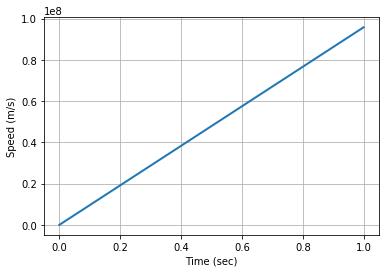

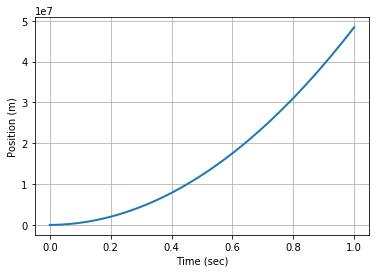

In [2]:
c = 2.998e8 # Speed of light in m/s
m = 0.938e9 # Mass in eV/c^2
Efield = 1  # Electric field in Volts per meter

x = 0     # Position in meters
v = 0     # Velocity in meters/second
t = 0     # Time in seconds
dt = 0.01 # Time STEP in seconds

# Create arrays using initial values
tArray = array(t)
xArray = array(x)
vArray = array(v)

while t < 1:
    # The dynamics:
    a = Efield * c**2 / m
    v = v + a*dt
    x = x + v*dt
    t = t + dt
    
    # Append the new values onto arrays
    tArray = append(tArray, t)
    xArray = append(xArray, x)
    vArray = append(vArray, v)
    
# Create plots
figure(1)
plot(tArray, vArray, linewidth=2)
xlabel('Time (sec)')
ylabel('Speed (m/s)')
grid(True)
show()

figure(2)
plot(tArray, xArray, linewidth=2)
xlabel('Time (sec)')
ylabel('Position (m)')
grid(True)
show()

## Step 2
##### DISCUSSION MATH

The following two cells ("Version 2" of this Assignment's code) contain the same code as "Version1" except that a few lines have been added in order to also calculate and plot the non-relativistic *energy*.

Locate the line where the non-relativistic energy is calculated. (The same line appears both inside the loop and before the loop.) Explain why this line is correct, using $\LaTeX$ to express the mathematics. You will need to be very careful with the units and the factors of $c^2$. Write down the equation for non-relativistic energy (including both rest energy and non-relativistic kinetic energy), and carefully argue why this line of code is correct.

[Add your explanation here. You can use $\LaTeX$ with dollar signs; double-click on the Theory section above to see examples of how to format equations.]

Execute this code, and look at the plot of energy versus time. Why does this plot have the shape that it has? How large is the kinetic energy compared to the rest energy after the proton has been accelerating for 1 second?

[Add your explanation here.]

In [3]:
from pylab import * # Import math functions.
%matplotlib inline  # Display graphs in the notebook.

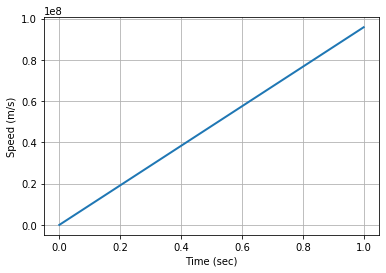

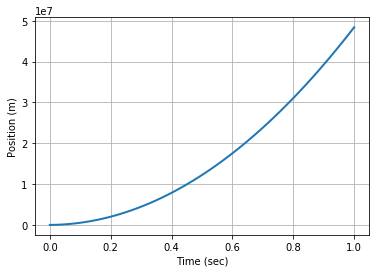

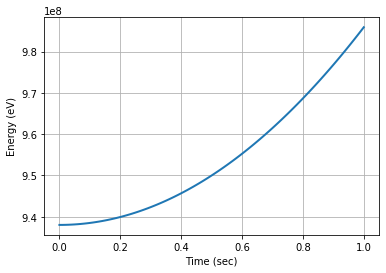

In [3]:
from pylab import *

c = 2.998e8 # Speed of light in m/s
m = 0.938e9 # Mass in eV/c^2
Efield = 1  # Electric field in Volts per meter

x = 0     # Position in meters
v = 0     # Velocity in meters/second
t = 0     # Time in seconds
dt = 0.01 # Time STEP in seconds

E = m + 0.5*(m/c**2)*v**2 # Energy

# Create arrays using initial values
tArray = array(t)
xArray = array(x)
vArray = array(v)
EArray = array(E)

while t < 1:
    # The dynamics:
    a = Efield * c**2 / m
    v = v + a*dt
    x = x + v*dt
    t = t + dt
    
    E = m + 0.5*(m/c**2)*v**2 # Energy
    
    # Append the new values onto arrays
    tArray = append(tArray, t)
    xArray = append(xArray, x)
    vArray = append(vArray, v)
    EArray = append(EArray, E)
    
# Create plots
figure(1)
plot(tArray, vArray, linewidth=2)
xlabel('Time (sec)')
ylabel('Speed (m/s)')
grid(True)
show()

figure(2)
plot(tArray, xArray, linewidth=2)
xlabel('Time (sec)')
ylabel('Position (m)')
grid(True)
show()

figure(3)
plot(tArray, EArray, linewidth=2)
xlabel('Time (sec)')
ylabel('Energy (eV)')
grid(True)
show()

## Step 3
##### DISCUSSION
Run Version 2 again, but now increase the value of the maximum time from 1 second to 5 seconds. How large is the kinetic energy compared to the rest energy after the proton has been accelerating for 5 seconds? Look at the plot of speed versus time. Something should bother you!  Explain what is wrong.

[Add your explanation here.]

## Step 4
##### DISCUSSION MATH
Derive the relativistic form of Newton's 2nd Law,
$$ a = \frac{F}{\gamma^3 m}, $$
from the equation $F = dp/dt$. See the Theory section for additional background.

Use $\LaTeX$ to express the mathematics.

[Add your explanation here. You can use $\LaTeX$ with dollar signs; double-click on the Theory section above to see examples of how to format equations.]


## Step 5
##### CODE
In the coding cells below is a copy of Version2 that you will modify. We'll call this "Version3." In Version3, you are going to modify the code in order to take special relativity into account. This will involve the following steps:
1. Compute the value of the Lorentz factor, $\gamma$. Note that $\gamma$ is sometimes a reserved name in python, so give it a different name (``g`` or ``lorentz``). Think about where this will need to take place: Inside the loop, outside the loop, or both?
2. Use the Lorentz factor to compute the acceleration in the loop.
3. Modify the equation for the energy (both before the loop and within the loop) in order to compute the *relativistic* energy.
**Hint**: Once you have computed the Lorentz factor, the relativistic energy is actually very simple to compute, but be very careful of the units and factors of $c^2$.

Execute your modified program, and fix any bugs!


In [ ]:
from pylab import *
%matplotlib inline

In [ ]:
from pylab import *

c = 2.998e8 # Speed of light in m/s
m = 0.938e9 # Mass in eV/c^2
Efield = 1  # Electric field in Volts per meter

x = 0     # Position in meters
v = 0     # Velocity in meters/second
t = 0     # Time in seconds
dt = 0.01 # Time STEP in seconds

E = m + 0.5*(m/c**2)*v**2 # Energy

# Create arrays using initial values
tArray = array(t)
xArray = array(x)
vArray = array(v)
EArray = array(E)

while t < 1:
    # The dynamics:
    a = Efield * c**2 / m
    v = v + a*dt
    x = x + v*dt
    t = t + dt
    
    E = m + 0.5*(m/c**2)*v**2 # Energy
    
    # Append the new values onto arrays
    tArray = append(tArray, t)
    xArray = append(xArray, x)
    vArray = append(vArray, v)
    EArray = append(EArray, E)
    
# Create plots
figure(1)
plot(tArray, vArray, linewidth=2)
xlabel('Time (sec)')
ylabel('Speed (m/s)')
grid(True)
show()

figure(2)
plot(tArray, xArray, linewidth=2)
xlabel('Time (sec)')
ylabel('Position (m)')
grid(True)
show()

figure(3)
plot(tArray, EArray, linewidth=2)
xlabel('Time (sec)')
ylabel('Energy (eV)')
grid(True)
show()

## Step 6
##### CODE DISCUSSION 
Execute your modified program (Version3) using a maximum time of 5 seconds, and look at the plot of speed versus time. Does the plot look better than the plot that you looked at in Exercise 3? It should!  If it doesn't, there is a bug in your code that needs to be fixed before you continue.
Explain why the new plot of speed versus time has the shape that it has.

[Add your explanation here.]

## Step 7
##### CODE DISCUSSION
Now that you have created a new program (**Congratulations**!), you should attempt to validate your program (to test how accurate the numbers actually are). One simple way to do this is using the energy.
From the work-energy theorem, the kinetic energy of the proton (starting from rest) is
$$ KE = W = \int F dx, $$ 
and since the force in our code is constant, the kinetic energy is simply the product of the (constant) force times the distance traveled. This "analytical" result (which does not involve any approximations) can be compared with the "numerical" kinetic energy from your program,
$$KE = \gamma m c^2 - mc^2.$$
Add code to your program (after the program's loop has completed) to compute the kinetic energy both analytically and numerically. Print both results, and make sure that they are similar. (If they aren't you need to fix something!)
Compute the [percent error](http://astro.physics.uiowa.edu/ITU/glossary/percent-error-formula/) in the numerical kinetic energy. How large is the error?
Increase the value of your program's time step by a factor of 10. How does this affect the error?  Why does this happen? (Consult the discussion of the Euler-Cromer algorithm described in the Theory section.)

[Add your explanations here.]

Before you continue to the next Step, make sure that the error is a small fraction of a percent.


## Step 8
##### DISCUSSION
Increase the maximum time for your simulation until you are able to get the total energy of the proton up to 100 GeV. Discuss the shape of each of the three plots (position, speed, and energy). Why do they have the shapes that they have? (Incorporate the term "ultra-relativistic" into your answer.)

[Add your description here.]

~~## Step 9~~
~~##### DISCUSSION~~
~~Using an electric field of $\epsilon = 1$ Volt/meter, how much time does it take to accelerate a proton to an energy of 100 GeV?  How far does it travel in that time? (Use your plots from Exercise 8.)~~

~~At the Large Hadron Collider (LHC), protons are accelerated to an energy of 8 TeV. Instead of using a longer simulation, *extrapolate* your results in order to determine how long it would take to accelerate a proton up to $E = 8$ TeV using $\epsilon = 1$ Volt/meter. 
How far does the proton travel during this time?
How many trips around the LHC would the proton make during this time?
How does this distance compare to the circumference of the
Earth's orbit around the sun?~~

~~[Add your discussion here.]~~

## Step 10 (extra credit)

At the [LHC](https://home.cern/science/accelerators/large-hadron-collider), protons are accelerated using much larger electric fields, $\epsilon = 5\times 10^6$ Volts/meter. Use your program to simulate a proton at the LHC being accelerated by this large electric field.
(**Hint**: You will need to significantly change the values of both the time step and the maximum time.)
Discuss your results.

[Add your discussion here.]

## Step 11 (extra credit)

You might have noticed that your program becomes very slow if you have a very large number of time steps. Part of this is unavoidable; each time step requires the computer to do some processessing. However, much of the computation time is consumed by appending new values onto the arrays.
Copy and paste your program into the cells below; we'll call this "Version4." Rewrite Version4 so that, instead of repeatedly appending to the arrays, you create large empty arrays *before* the loop; then in each iteration of the loop, you record the new numbers in the appropriate element of the array. Observe and discuss how this affects the computation time.

[Add your discussion here.]